# Practical 7: heat equation

We will solve the time-dependent heat equation at an ice divide. We assume that heat only flows vertically, so we will use the one-dimensional version of the equation:

$$
\frac{\partial T}{\partial t} = -  w \frac{\partial T}{\partial z} +  \alpha\frac{\partial^2 T}{\partial z^2} 
$$

where $T$ is the temperature, which varies with time $t$ and vertical position $z$, $w$ is the vertical velocity, defined as positive upwards, $\alpha$ is the thermal diffusivity. 

We will impose a constnat vertical velocity

$$
w(z) = -a\left(1-\frac{n+2}{n+1}\frac{z}{H} + \frac{1}{n+1}\left(\frac{z}{H}\right)^{n+2}\right), 
$$

where $H$ is the ice thickness, $a$ is the accumulation rate, and $n$ is the exponent in Glen's flow law. This expression can be derived from the shallow ice appproximation by differentiating the SIA expression for the horizontal flow sped $u$ with respect to the horizontal position $x$ and integrating the negative of the result with respect to $z$. 

For boundary conditions we will fix the temperature at the surface and fix the gradient of the temperature at the base of the ice sheet so that the heat flux into the ice sheet equals the geothermal heat flux, $G$: 

$$
\frac{\partial T}{\partial z} = \frac{G}{k}.
$$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# time domain
dt_years = 1;                       # time step in years
seconds_per_year = seconds_per_year # approximate number of seconds in year
dt = dt_years*seconds_per_year;     # time step in seconds
t_total_years = 3e4;                # total length of the simulation in years
T = t_total_years*seconds_per_year; # total length of the simulation in seconds

t = np.linspace(0,T,round(T/dt))  # the time grid, units [years]
Lt = t.size 

# space domain
dz = 10                           # grid spacing, units [m]
H = 1000                          # ice thickness, units [m]
z = np.linspace(0,H,round(H/dz))  # spatial grid, units [m]
Lz = z.size  


alpha = 1.25e-6; #k/rho_i/c;      # thermal diffusivity
G = 60e-3;                        # geothermal heat flux 60 mW/m^2        http://en.wikipedia.org/wiki/Geothermal_gradient
k = 2.3;                          # Thermal conductivity of ice at -10C     http://www.engineeringtoolbox.com/ice-thermal-properties-d_576.html

    
## vertical ice velocity
a_yr = 0.1
a = a_yr/seconds_per_year    # accumulation in meters/second
w = -np.linspace(0,a,Lz)     # vertical velocity, sign convention is that up is positive, and we are assuming it varies from zero at the bed to a at the surface

## surface forcing
T_surf = -20                 # surface temperature 

T = np.zeros((Lt,Lx))

## initial conditions
T[0,:]  = np.linspace(0,T_surf,Lz);

### Main Loop ###
for timestep in np.arange(1,Lt):
    # step the temperature forward in time
[MISSING CODE HERE. HINT: APPLY CENTERED DIFFERENCE TWICE TO GET AN EXPRESSION FOR THE SECOND DERIVATIVE]
    # BCs
    T[timestep,-1] = T_surf;
    T[timestep,0] = T[timestep,1] + G/k*dz


To plot a profile use the following. 

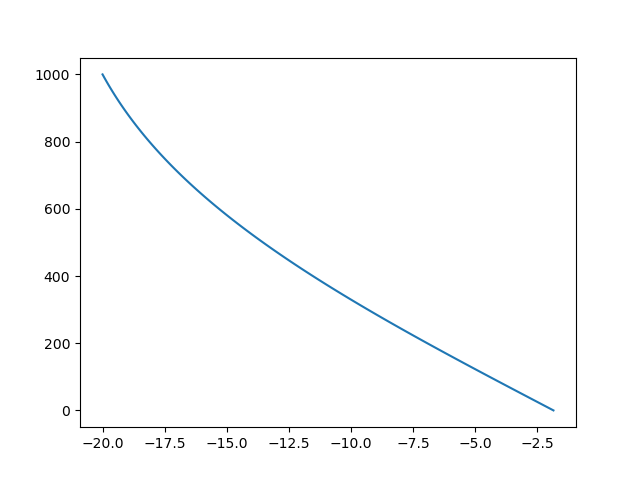

In [30]:
plt.plot(T[-1,:],z)

In [33]:
## Use this code to plot an animation of your model results. 

# imports: you may need to import `conda install ipympl`
%matplotlib widget
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

def animate_ice_model_results(z, t, f, interval_between_timesteps = 1000, time_delay_between_frames = 100):
    # run this function by, e.g., `animate_ice_model_results(x, t, H)`

    # open a figure and an axes inside the figure
    fig, ax = plt.subplots()

    # set the limits of the axes
    ax.set_ylim(( z[0], z[-1]))    # the vertical axis will go from 0 to H
    ax.set_xlim((np.min(f), np.max(f)))   # the horizontal axis will got from lowest T to the highest T

    # create an line object with no data, and suppress the plot 
    line, = ax.plot([], [], lw=2);
    plt.close()

    # define a function which updates the figure, given a timestep number. This function plots the line and updates the axis labels. 
    def animate(timestep):
        line.set_data(f[timestep,:], z)                 # update the data
        ax.set_title(f"$t$ = {t[timestep]/seconds_per_year:.1f} years")  # update the title
        ax.set_ylabel("height, $z$ [m]")              # update the x label
        ax.set_xlabel("temperature $T(x,t)$ [C]")  # update the y label, change this if you want to plot something other than ice surface height
        return line

    # setup the animation 
    anim = animation.FuncAnimation(fig, animate, 
                                   frames = np.arange(0, len(t), interval_between_timesteps),
                                   interval = time_delay_between_frames, 
                                   blit=True)
    
    return anim

In [ ]:
# run the function to display the animation
animate_ice_model_results(z, t, T)